In [1]:
%load_ext autoreload

%autoreload 2

In [41]:
import glob
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import SNOM_Import
import hdf5storage

import scipy.io as sio


In [3]:
sys.path.append('/mnt/c/Users/conor/Git_Projects/PHD')

In [ ]:
files = dict()

for i, file_path in tqdm(enumerate(glob.glob("/mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant/*HEADR*")[-20:])):

    file_name = file_path.split('/')[-1].split('HEADR')[0]
    files[file_name] = SNOM_Import.SNOM_File(file_path[:-14])


In [6]:
df = pd.DataFrame({name: vars(file) for name, file in files.items()}).T

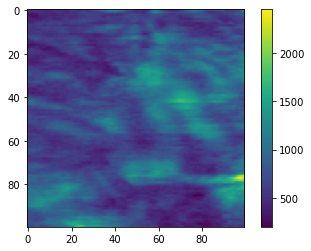

In [7]:
ax=plt.imshow(df.iloc[13].FSNOM)
plt.colorbar(ax)

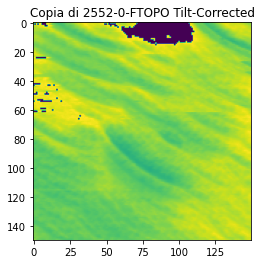

In [8]:
fig, ax1 = plt.subplots(ncols=1)

for i, row in df.iloc[-70:,:].iterrows():

    try:
        ax1.set_title(i+ 'FTOPO Tilt-Corrected')
        ax1.imshow(row.FTOPO)

        #fig.savefig(os.path.join(os.getcwd(), 'Tilt_Corrected_Images' ,f"{i}-FTOPO Tilt-Corrected.png"), bbox_inches = 'tight')

    except: pass

In [50]:
def plane_correct(image):

    m, n = image.shape

    X1, X2 = np.mgrid[:m, :n]

    X = np.hstack((np.reshape(X1, (m*n, 1)) , np.reshape(X2, (m*n, 1)) ) )
    X = np.hstack((np.ones((m*n, 1)) , X ))
    YY = np.reshape(image, (m*n, 1))

    theta = np.dot(np.dot( np.linalg.pinv(np.dot(X.transpose(), X)), X.transpose()), YY)

    plane = np.reshape(np.dot(X, theta), (m, n));
    Y_corr = image-plane

    return Y_corr


In [28]:
file_dict = hdf5storage.loadmat(file_list[0])

In [89]:
file_path

'/mnt/c/Users/conor/Git_Projects/PHD/tilt_corrected_files'

In [92]:
for file_ in glob.glob('/mnt/c/Users/conor/Google Drive/PhD/SNOM_Creep_Corrected/*.mat'):

    for file_name, _file in file_dict.items():

        data_files={
            'FSNOM': _file[0][0][0][0],
            'BSNOM': _file[0][0][0][1],
            'FZERO': _file[0][0][0][2],
            'BZERO': _file[0][0][0][3],
            'FTOPO': _file[0][0][0][4],
            'BTOPO': _file[0][0][0][5],
            'FSNOM_Tilt_Corrected': plane_correct(_file[0][0][0][0]),
            'BSNOM_Tilt_Corrected': plane_correct(_file[0][0][0][1]),
            'FTOPO_Tilt_Corrected': plane_correct(_file[0][0][0][4]),
            'BTOPO_Tilt_Corrected': plane_correct(_file[0][0][0][5]),
        }

        file_path = os.path.join(os.getcwd(), 'tilt_corrected_files')
        file_name = file_name+'.mat'

        try: os.mkdir(file_path)
        except: pass

        savemat(os.path.join(file_path, file_name), mdict=data_files)



/mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant/Copia di 2552-0


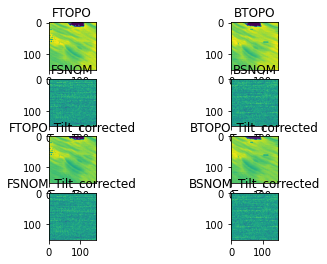

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=4)

for index, row in df.iterrows():

        im_file=row

        ftopo = im_file.FTOPO
        fsnom = im_file.FSNOM

        plane = plane_correct(ftopo)

        plane_n = (plane)/plane.max()
        fsnom_n = (fsnom)/fsnom.max()

        print(im_file.fileName)

        data = {'FTOPO': im_file.FTOPO,
                'BTOPO': im_file.BTOPO,
                'FSNOM': im_file.FSNOM,
                'BSNOM': im_file.BSNOM,
                'FTOPO_Tilt_corrected': im_file.FTOPO-plane_correct(im_file.FTOPO),
                'BTOPO_Tilt_corrected': im_file.BTOPO-plane_correct(im_file.BTOPO),
                'FSNOM_Tilt_corrected': im_file.FSNOM-plane_correct(im_file.FSNOM),
                'BSNOM_Tilt_corrected': im_file.BSNOM-plane_correct(im_file.BSNOM)}


        os.makedirs(os.path.getcwd(), )

        savemat(os.path.join(os.getcwd(), 'test.mat'), data)

        for ax, (title, im) in zip(axes.flatten(), data.items()):

                ax.imshow(im)
                ax.set_title(title) 